## Weather Forecast Multivar Models Results

In [1]:
%matplotlib inline

# import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()

RESULTS_PATH = "results\\"

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
# read 'SF.csv'  dataset as a dataframe
results_df = pd.read_excel(RESULTS_PATH + 'univar_results_final.xlsx')
print(results_df.info(verbose = True, null_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
label    7 non-null object
mae      7 non-null float64
mape     7 non-null float64
rmse     7 non-null float64
dtypes: float64(3), object(1)
memory usage: 304.0+ bytes
None


In [4]:
# initialize a list to store test results
test_ar = []

In [5]:
for i in range(results_df.shape[0]):
    row = results_df.iloc[i,:]
    mape = row['mape']
    mae = row['mae']
    rmse = row['rmse']
    label = row['label']
    test_ar.append({'label':label, 'mape' : mape, 'mae': mae,'rmse':rmse})
print(test_ar)

[{'label': 'Naive Model', 'mape': 0.034968689794507, 'mae': 2.10909513609526, 'rmse': 2.87026692130815}, {'label': 'ARIMA', 'mape': 0.0257958334737381, 'mae': 1.72718067918146, 'rmse': 1.98861825758103}, {'label': 'LinearRegression', 'mape': 0.0323920474333905, 'mae': 0.0173780015917688, 'rmse': 0.0265914130797212}, {'label': 'RandomForestRegressor', 'mape': 0.0313033762990866, 'mae': 0.0167103438023473, 'rmse': 0.0247215025038766}, {'label': 'XGBRegressor', 'mape': 0.0322259795249872, 'mae': 0.0173218586075792, 'rmse': 0.0265476495874521}, {'label': 'DL-Univar_LSTM_temperature', 'mape': 1.9197512, 'mae': 0.01067764, 'rmse': 0.015749771}, {'label': 'DL-Univar_MLP_temperature', 'mape': 0.4829912, 'mae': 0.0027220475, 'rmse': 0.0062357616}]


In [6]:
# Function to plot root mean square error of different Models for test data set as bar graph
def plot_rmse():
    # Set figure width and height
    plt.rcParams["figure.figsize"] = [12, 5]
    
    rmse = []
    label = []
    x = np.linspace(0, len(test_ar)-1, len(test_ar))
    
    for i in range(len(test_ar)):
        rmse.append(test_ar[i]['rmse'])
        label.append(test_ar[i]['label'])
    g = sns.barplot(x, rmse)
    plt.title('Root Mean Square Error For Test Data Set For Temperature')
    plt.xlabel('Models')
    plt.ylabel('RMSE Value')
    plt.xticks(x, label, rotation=15)

    rects = g.patches
    for rect, i in zip(rects, range(len(test_ar))):
        height = rect.get_height()
        g.text(rect.get_x() + rect.get_width()/2, height, ('%0.5f' % test_ar[i]['rmse']), ha='center', va='bottom')
    plt.show()

In [7]:
# Function to plot Mean Absolute Percent Error  of different Models for test data set as bar graph
def plot_mape():
    # Set figure width and height
    plt.rcParams["figure.figsize"] = [12, 5]
    
    mape = []
    label = []
    x = np.linspace(0, len(test_ar)-1, len(test_ar))
    
    for i in range(len(test_ar)):
        mape.append(test_ar[i]['mape'])
        label.append(test_ar[i]['label'])
    g = sns.barplot(x, mape)
    plt.title('Mean Absolute Percent Error For Test Data Set For Temperature')
    plt.xlabel('Models')
    plt.ylabel('MAPE Value')
    #plt.ylim([0.5, 0.75])
    plt.xticks(x, label, rotation=15)

    rects = g.patches
    for rect, i in zip(rects, range(len(test_ar))):
        height = rect.get_height()
        g.text(rect.get_x() + rect.get_width()/2, height, ('%0.5f' % test_ar[i]['mape']), ha='center', va='bottom')
    plt.show()

In [8]:
# Function to plot Mean Absolute Error of different Models for test data set as bar graph
def plot_mae():
    # Set figure width and height
    plt.rcParams["figure.figsize"] = [12, 5]
    
    mae = []
    label = []
    x = np.linspace(0, len(test_ar)-1, len(test_ar))
    
    for i in range(len(test_ar)):
        mae.append(test_ar[i]['mae'])
        label.append(test_ar[i]['label'])
    g = sns.barplot(x, mae)
    plt.title('Mean Absolute Error For Test Data Set For Temperature')
    plt.xlabel('Models')
    plt.ylabel('MAE Value')
    plt.xticks(x, label, rotation=15)

    rects = g.patches
    for rect, i in zip(rects, range(len(test_ar))):
        height = rect.get_height()
        g.text(rect.get_x() + rect.get_width()/2, height, ('%0.5f' % test_ar[i]['mae']), ha='center', va='bottom')
    plt.show()

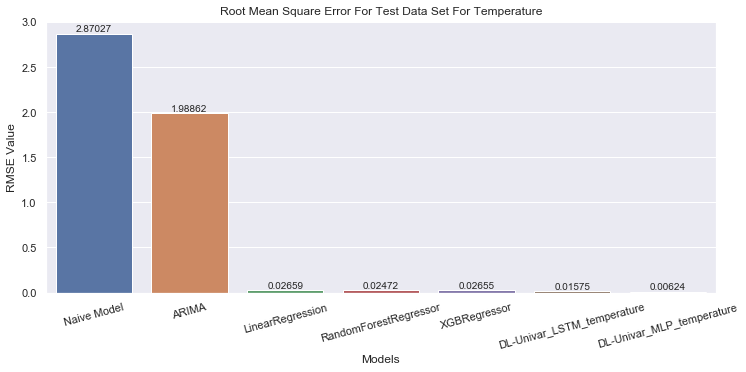

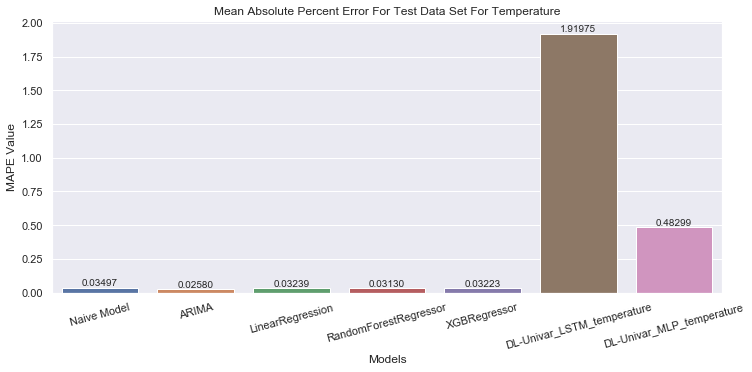

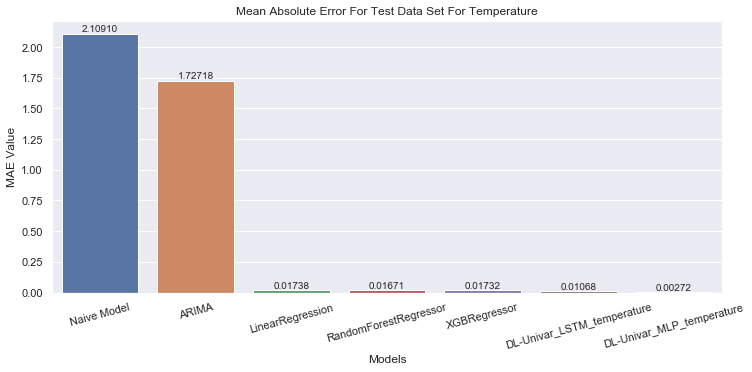

In [9]:
plot_rmse()
plot_mape()
plot_mae()